<a href="https://colab.research.google.com/github/cantaruttim/Rotinas/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Documentação

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
fig = plt.figure()  # an empty figure with no Axes
fig.show()

<Figure size 640x480 with 0 Axes>

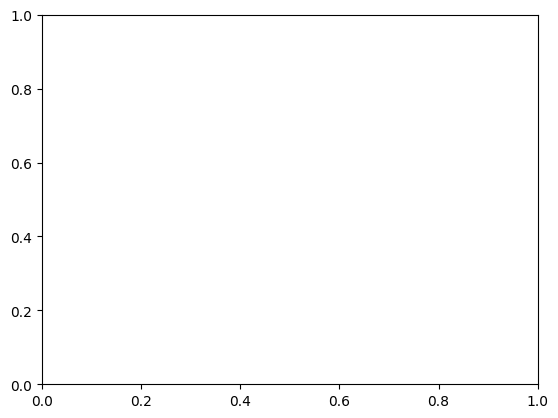

In [3]:
fig, ax = plt.subplots()  # a figure with a single Axes

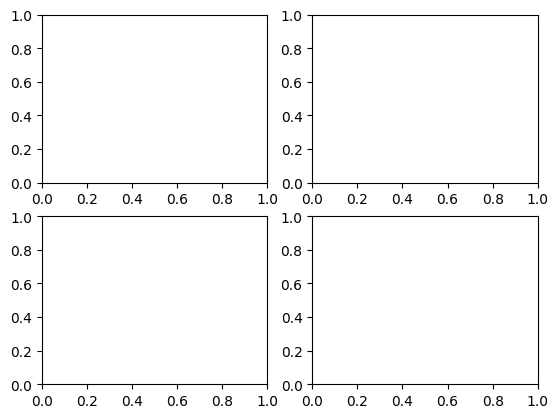

In [4]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:

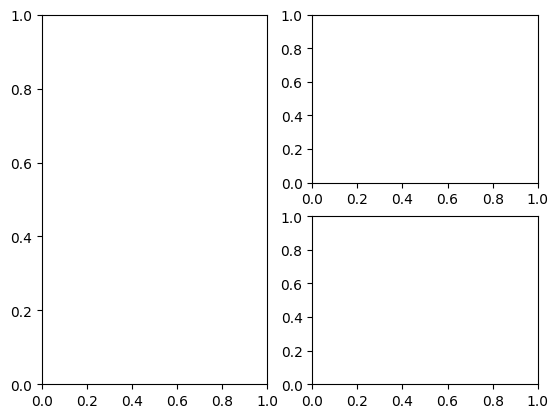

In [5]:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

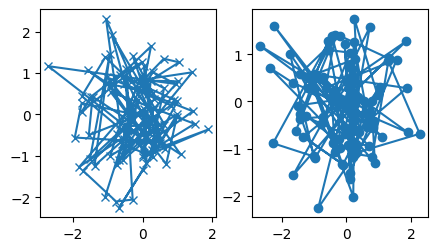

In [7]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Color formats

https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def

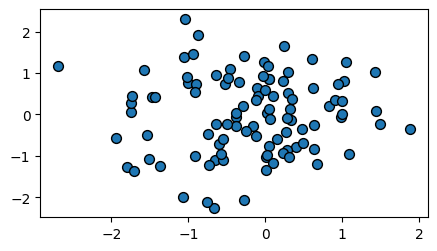

In [8]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

## Line style examples

https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

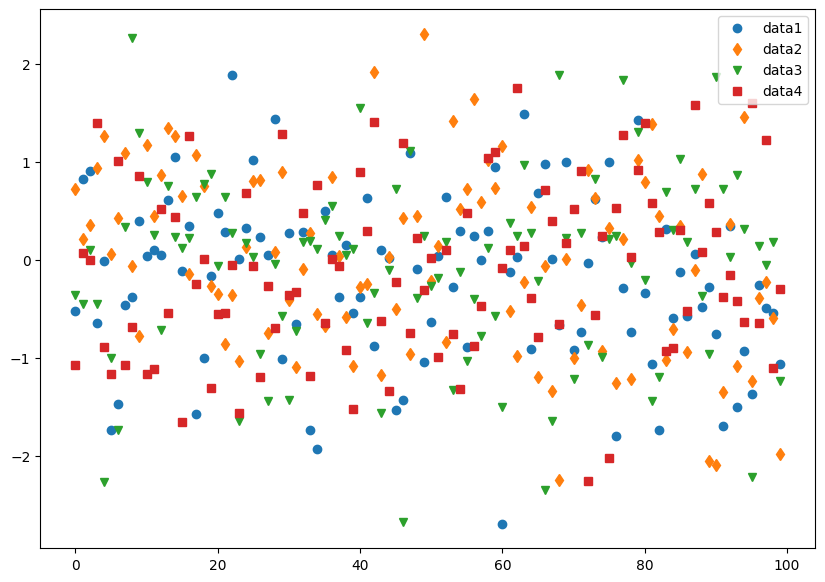

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## Labelling plots

https://matplotlib.org/stable/users/explain/text/mathtext.html#mathtext

<br>

https://matplotlib.org/stable/users/explain/text/usetex.html#usetex

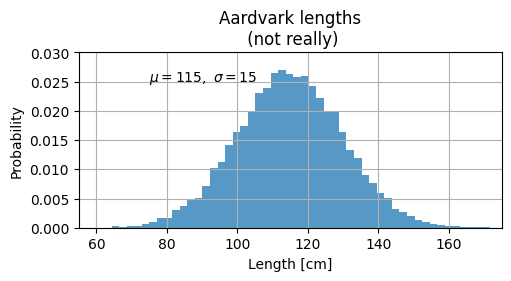

In [10]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

## Annotations

https://matplotlib.org/stable/users/explain/text/annotations.html#plotting-guide-annotation

<br>

https://matplotlib.org/stable/users/explain/text/annotations.html#annotations-tutorial

<br>

https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html


(-2.0, 2.0)

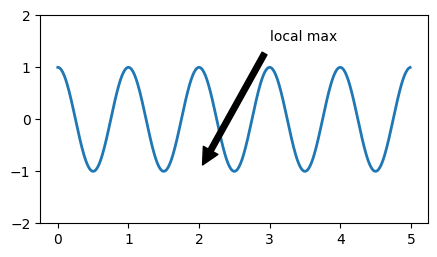

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, -1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

## Scaling

https://matplotlib.org/stable/gallery/scales/scales.html

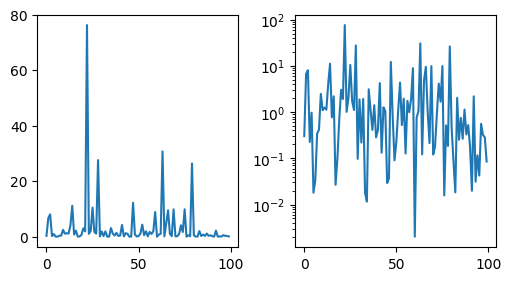

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data) ;

## Additional Axis objects

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using twinx to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for twiny). See Plots with different scales for another example.

Similarly, you can add a secondary_xaxis or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units. See Secondary Axis for further examples.

Text(0.5, 0, 'Angle [°]')

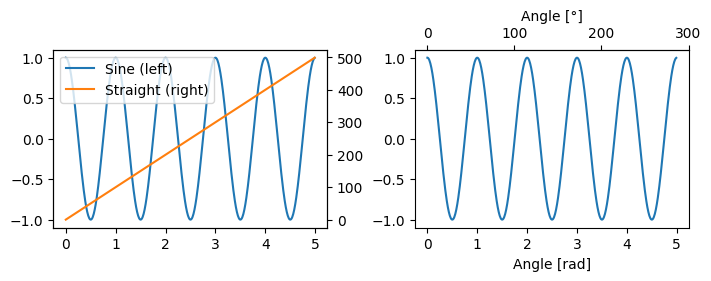

In [13]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## Color mapped maps

Text(0.5, 1.0, 'scatter()')

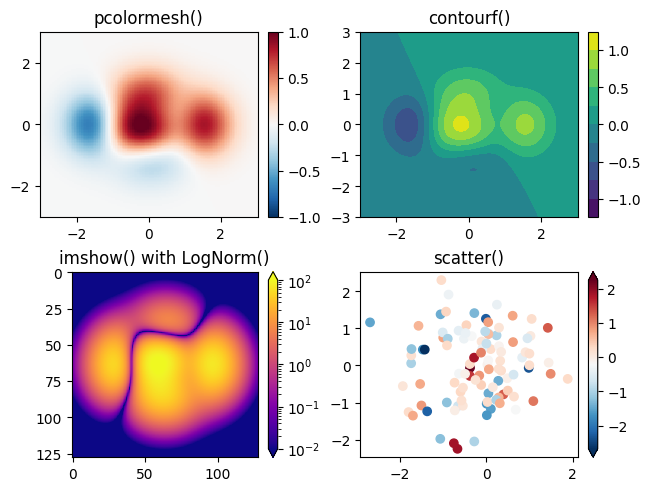

In [14]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

In [15]:
## ORIGINAL

# fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5),
#                         layout="constrained")
# # for each Axes, add an artist, in this case a nice label in the middle...
# for row in range(2):
#     for col in range(2):
#         axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
#                             transform=axs[row, col].transAxes,
#                             ha='center', va='center', fontsize=18,
#                             color='darkgrey')
# fig.suptitle('plt.subplots()')

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# for each Axes, add an artist, in this case a nice label in the middle...
def plotting_axes(n, z):

  fig, axs = plt.subplots(ncols=n, nrows=z, figsize=(3.5, 2.5),
                        layout="constrained")

  for row in range(n):
      for col in range(z):
          axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                              transform=axs[row, col].transAxes,
                              ha='center', va='center', fontsize=18,
                              color='darkgrey')

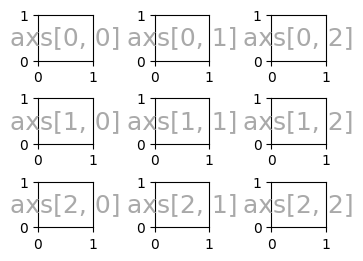

In [17]:
plotting_axes(3, 3)

## plot types

https://matplotlib.org/stable/plot_types/index.html#plot-types


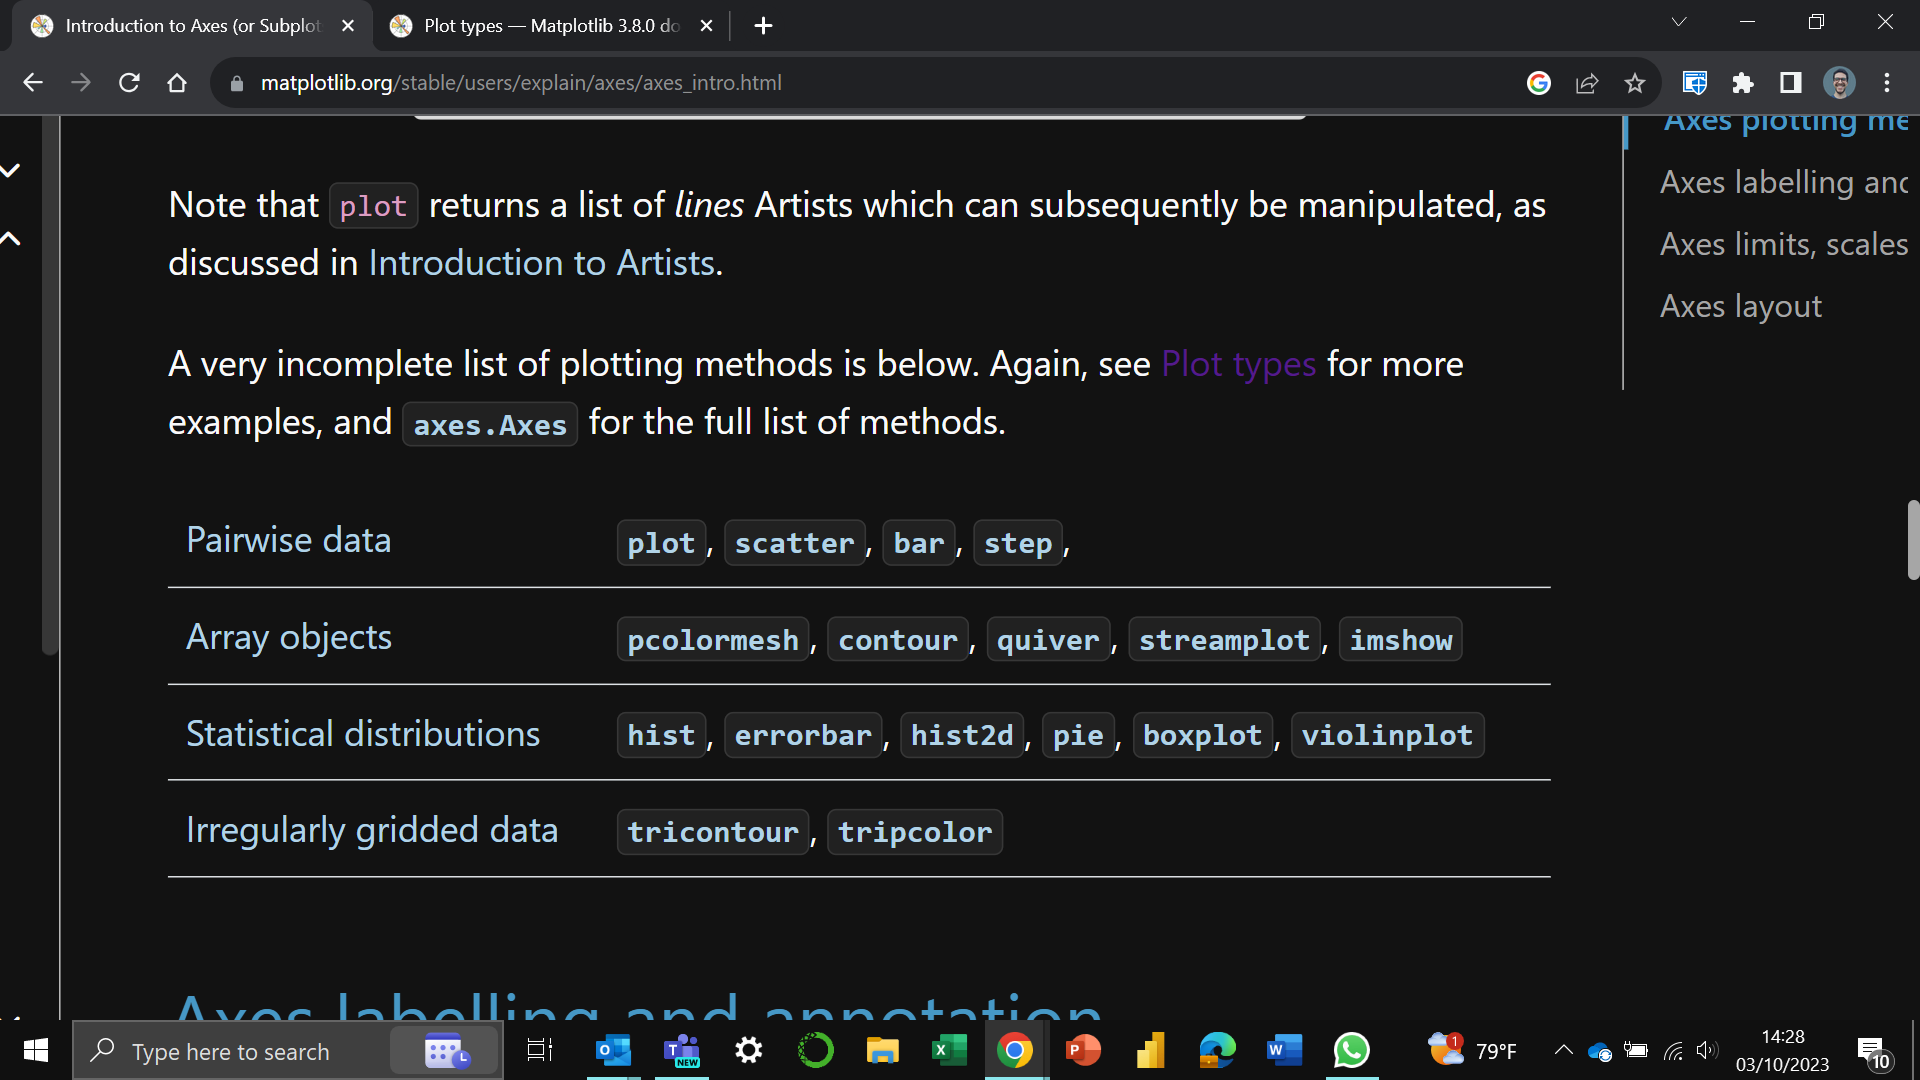

## tick params

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params

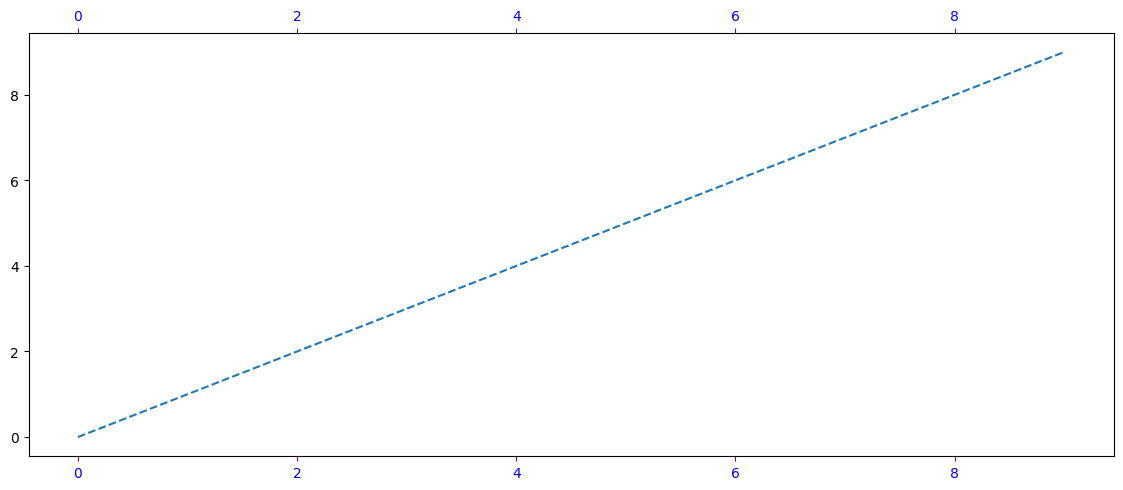

In [18]:
fig, ax = plt.subplots(figsize=(14, 5.5))
ax.plot(np.arange(10), linestyle='dashed')
ax.tick_params(top=True, labeltop=True, color='purple', axis='x',
               labelcolor='blue')

Text(0.5, 1.0, 'aspect=3')

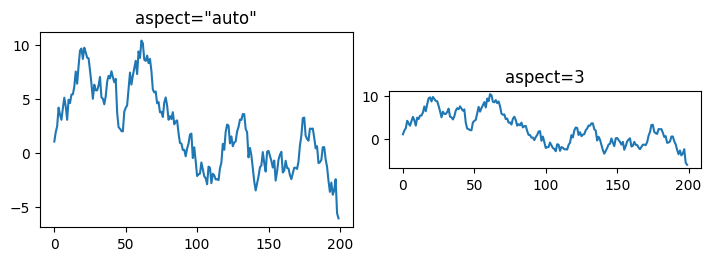

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(7, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
axs[0].plot(t, x)
axs[0].set_title('aspect="auto"')

axs[1].plot(t, x)
axs[1].set_aspect(3)
axs[1].set_title('aspect=3')

## Basic 2x2 grid

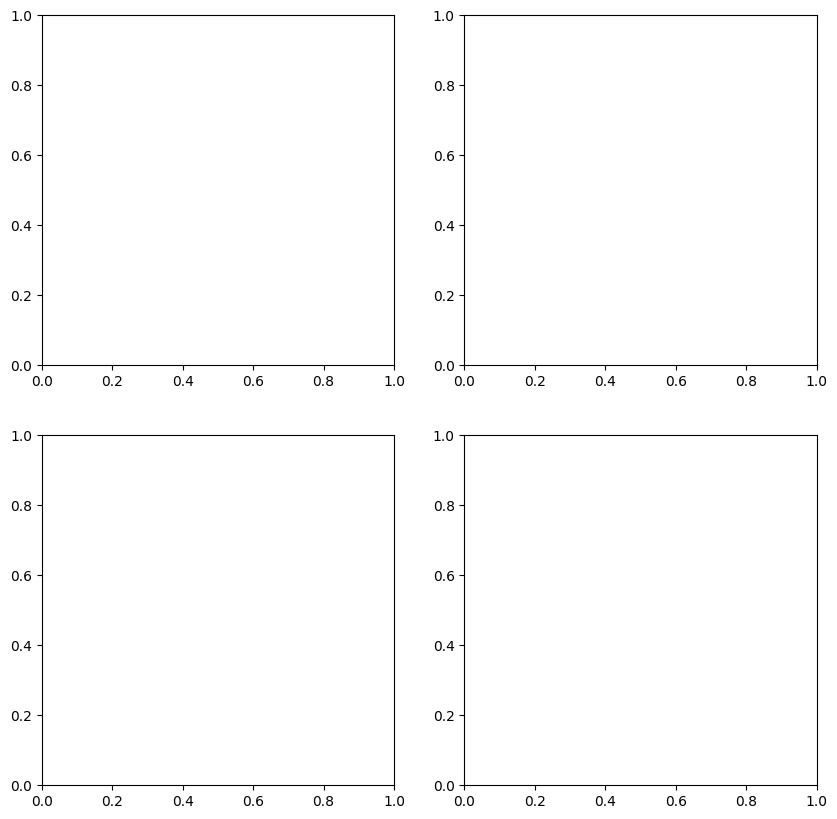

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

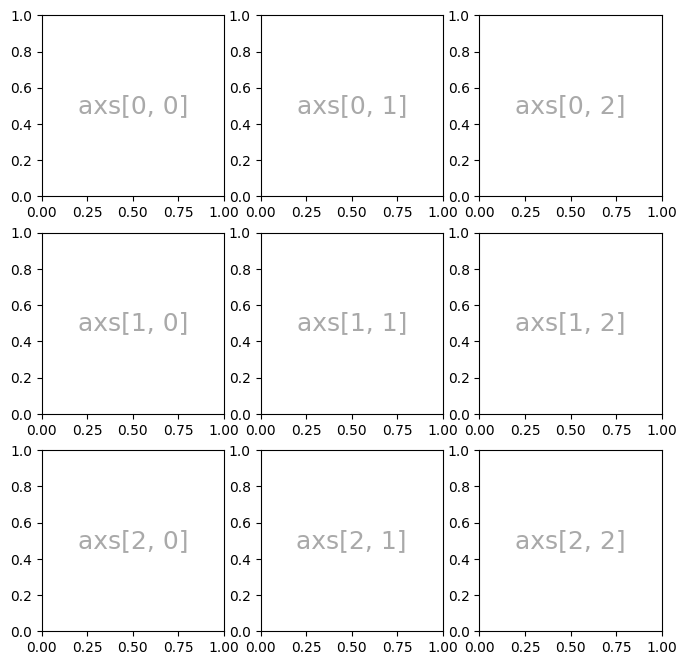

In [21]:
def subplots(r, c):
  fig, axs = plt.subplots(ncols=r, nrows=c, figsize=(8, 8))

  # add an artist, in this case a nice label in the middle...
  for row in range(r):
      for col in range(c):
          axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                                transform=axs[row, col].transAxes,
                                ha='center', va='center', fontsize=18,
                                color='darkgrey')

  return fig.show()

subplots(3, 3)

In [22]:
def annotate_axes(ax, text, fontsize=18):
  ax.text(0.5, 0.5, text, transform=ax.transAxes, ha="center", va="center", fontsize=fontsize, color="darkgrey")

In [23]:
def double_grid(r1, c1, r2, c2):

  """ # linhas e colunas da esquerda ; # linhas e colunas da direita"""

  def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

  fig = plt.figure(layout="constrained")
  gs0 = fig.add_gridspec(1, 2)

  gs00 = gs0[0].subgridspec(r1, c1)
  gs01 = gs0[1].subgridspec(r2, c2)

  for a in range(r1):
      for b in range(c1):
          ax = fig.add_subplot(gs00[a, b])
          annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
          if a == 1 and b == 1:
              ax.set_xlabel('xlabel')
  for a in range(r2):
    for b in range(c2):
        ax = fig.add_subplot(gs01[a])
        annotate_axes(ax, f'axRight[{a}, {b}]')
        if a == 2:
            ax.set_ylabel('ylabel')

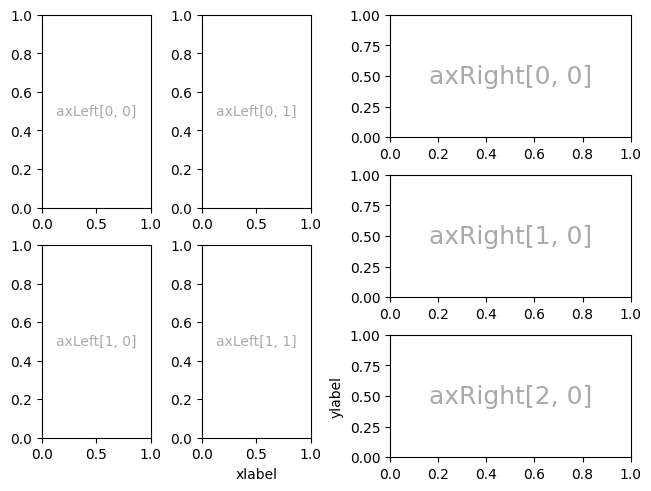

In [24]:
double_grid(2, 2, 3, 1)

# Testando

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("supermarket_sales.csv")

In [27]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [28]:
df.drop('Invoice ID', axis = 1, inplace = True)

In [29]:
df = df[ df['Customer type'] == 'Member']
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
994,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [30]:
gender = [len(df[ df['Gender'] == 'Female']), len(df[ df['Gender'] == 'Male'])]
gender

[261, 240]

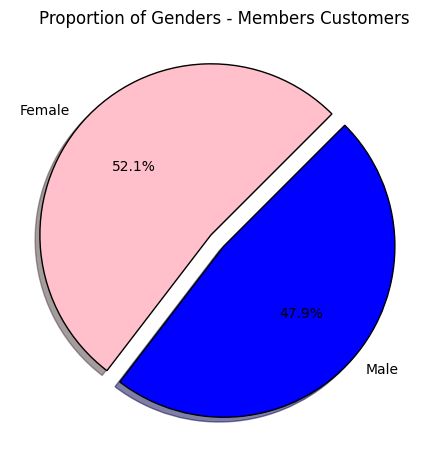

In [31]:
plt.title("Proportion of Genders - Members Customers")

labels = ['Female', 'Male']
colors = ['pink', 'blue']
explode = [0.1,0]

plt.pie(gender, labels=labels, shadow = True,
        startangle = 45, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'},
        explode=explode, colors=colors)

plt.tight_layout()
plt.show()

In [32]:
df = pd.read_csv("supermarket_sales.csv")

In [33]:
df = df[ df['Customer type'] == 'Normal']
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [34]:
Normalgender = [len(df[ df['Gender'] == 'Female']), len(df[ df['Gender'] == 'Male'])]
Normalgender

[240, 259]

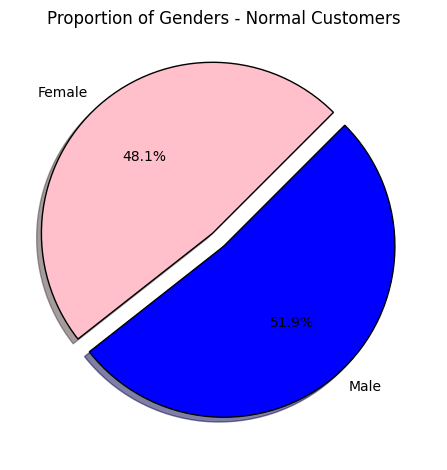

In [35]:
plt.title("Proportion of Genders - Normal Customers")

labels = ['Female', 'Male']
colors = ['pink', 'blue']
explode = [0.1,0]

plt.pie(Normalgender, labels=labels, shadow = True,
        startangle = 45, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'},
        explode=explode, colors=colors)

plt.tight_layout()

plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("supermarket_sales.csv")
df = df.groupby('Date').sum()

<ipython-input-36-4ca7fc7f3569>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Date').sum()


In [37]:
df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
1/1/2019,659.95,81,225.9610,4745.1810,4519.22,57.142857,225.9610,79.0
1/10/2019,522.46,55,169.5690,3560.9490,3391.38,42.857143,169.5690,54.6
1/11/2019,479.70,40,100.7125,2114.9625,2014.25,38.095238,100.7125,56.8
1/12/2019,625.90,80,246.8935,5184.7635,4937.87,52.380952,246.8935,75.3
1/13/2019,531.50,50,116.7240,2451.2040,2334.48,47.619048,116.7240,67.2
...,...,...,...,...,...,...,...,...
3/5/2019,990.01,103,296.7085,6230.8785,5934.17,80.952381,296.7085,114.3
3/6/2019,563.17,63,147.2665,3092.5965,2945.33,52.380952,147.2665,79.3
3/7/2019,430.76,37,68.4885,1438.2585,1369.77,42.857143,68.4885,62.9


In [38]:
# cogs = df['cogs']
# income = df['gross income']

# plt.plot(cogs, color = 'red', linestyle='--', label='Quantidade')
# plt.plot(income, color = 'blue', linestyle='--', label='Avaliação')

# # plt.fill_between(cogs, income)

# plt.legend()
# plt.show()

In [45]:
df = pd.read_csv("dados.csv")
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [46]:
def spliting_categorical(x, y):

  """ARRUMAR ESSA FUNÇÃO"""
  x_index = np.arange(len(x))
  width = .25
  neg = plt.bar(x_index - width, y)
  pos = plt.bar(x_index  + width, y)

  return neg, pos

In [ ]:
spliting_categorical(df['Idade'].values, df['Altura'].values)

In [ ]:
plt.bar(df['Idade'].values, df['Renda'].values)

In [ ]:
sexo = [len(df[df['Sexo'] == 0]), len(df[df['Sexo'] == 1])]
sexo

In [ ]:
plt.title("Proportion of Genders")

labels = [0, 1]
colors = ['pink', 'blue']
explode = [0.1,0]

plt.pie(sexo, labels=labels, shadow = True,
        startangle = 45, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'},
        explode=explode, colors=colors)

plt.tight_layout()
plt.show()

In [ ]:
df

In [ ]:
Sexo = df[df['Sexo'] == 0]

plt.plot(Sexo['Idade'], Sexo['Sexo'], color = 'red', linestyle='--')

plt.legend()
plt.show() ;